In [2]:
import os
from Utils.visualization import *

Precision:0.6111, Recall:0.5867, F1-score:0.5986, Accuraci:0.5083, AUC:0.2773


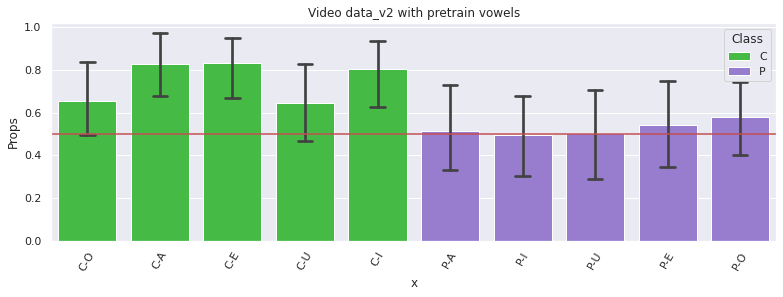

In [3]:
data_path = 'Results/Note:VIDEO:LOO_data_v2-Lr:0.001-Epoch:10-Exercise:Vowels.csv'
view_results(data_path)
plot_results(data_path, 'Video data_v2 with pretrain vowels', 'Exercise_g')

Precision:0.5897, Recall:0.5111, F1-score:0.5476, Accuraci:0.4722, AUC:0.3712


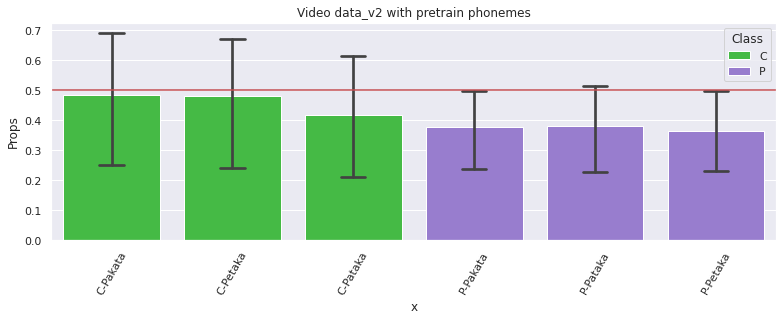

In [4]:
data_path = 'Results/Note:VIDEO:LOO_data_v2-Lr:0.001-Epoch:10-Exercise:Phonemes.csv'
view_results(data_path)
plot_results(data_path, 'Video data_v2 with pretrain phonemes', 'Exercise_g')

Precision:0.5714, Recall:0.5333, F1-score:0.5517, Accuraci:0.4583, AUC:0.2000


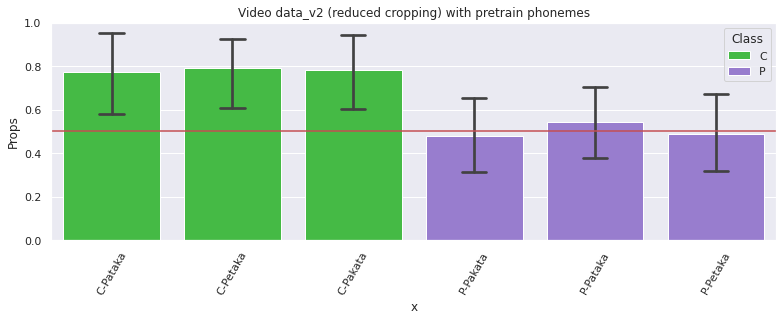

In [8]:
data_path = 'Results/Note:VIDEO:LOO_data_v2(reduced cropping)-Lr:0.001-Epoch:10-Exercise:Phonemes.csv'
view_results(data_path)
plot_results(data_path, 'Video data_v2 (reduced cropping) with pretrain phonemes', 'Exercise_g')

Precision:0.7662, Recall:0.6556, F1-score:0.7066, Accuraci:0.6597, AUC:0.6448


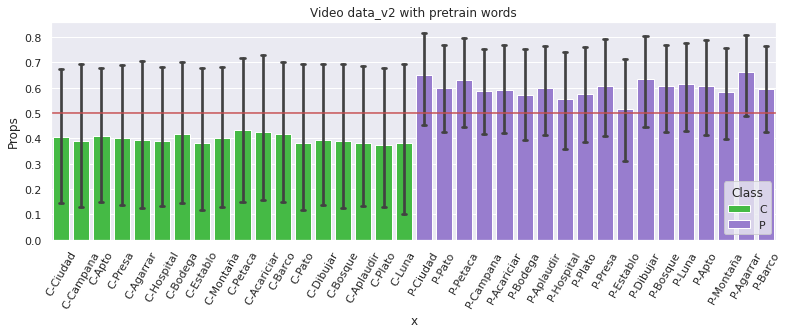

In [7]:
data_path = '/home/brayan/audiovisualpk/Results/Note:VIDEO:LOO_data_v2-Lr:0.001-Epoch:10-Exercise:Words.csv'
view_results(data_path)
plot_results(data_path, 'Video data_v2 with pretrain words', 'Exercise_g')

Precision:0.6250, Recall:1.0000, F1-score:0.7692, Accuraci:0.6250, AUC:0.0584


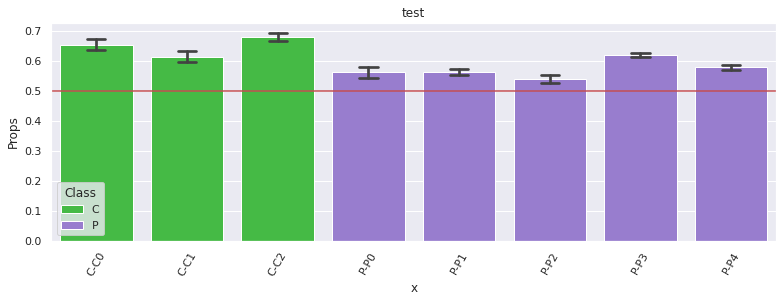

In [3]:
data_path = 'Results/Note:VIDEO:LOO_data_v2(reduced cropping)-Lr:1e-05-Epoch:10-Exercise:Phonemes.csv'
view_results(data_path)
plot_results(data_path, 'test', 'Sample_ids')